## Predicting customer satisfaction
The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.
The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. 
You will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In [2]:
# Standard operational package imports
import numpy as np
import pandas as pd

In [3]:
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

In [4]:
# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_original = pd.read_csv("/Users/andrew/Downloads/Files 5/home/jovyan/work/Invistico_Airline.csv")

In [6]:
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Data exploration, data cleaning, and model preparation

Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes:

• Exploring the data

• Checking for missing values

• Encoding the data

• Renaming a column

• Creating the training and testing data

In [7]:
# Explore the data
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Output unique values

The Class column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the Class column.

In [8]:
df_original["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [9]:
satisfied = df_original['satisfaction'].value_counts().iloc[0]
dissatisfied = df_original['satisfaction'].value_counts().iloc[1]
num = len(df_original)
[round(satisfied/num,4), round(dissatisfied/num,4)]

[0.5473, 0.4527]

<Axes: xlabel='satisfaction'>

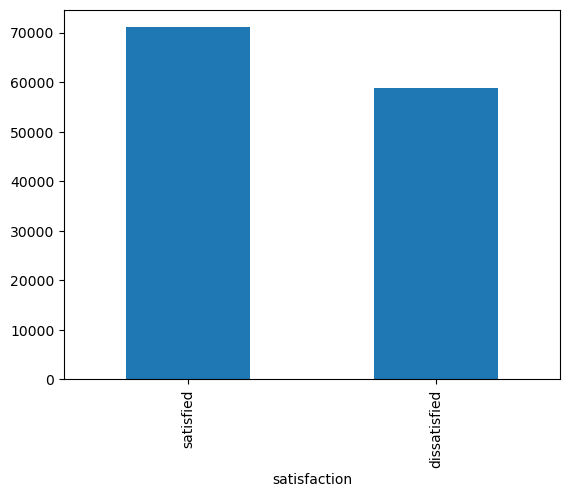

In [10]:
df_original['satisfaction'].value_counts().plot(kind='bar')

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data.

In [11]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Question: Why is it important to check how many rows and columns there are in the dataset?

This is important to check because if there are only a small number of missing values in the dataset, they can more safely be removed.

In [12]:
# Check the number of rows and columns in the dataset
df_original.shape

(129880, 22)

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.

In [13]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

### Check for missing values

Check that df_subset does not contain any missing values.

In [14]:
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [15]:
# Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.
df_subset.shape

(129487, 22)

### Encode the data

Four columns (satisfaction, Customer Type, Type of Travel, Class) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal Class column into numeric.

In [16]:
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign "satisfied" to the label 1 and "dissatisfied" to the label 0 in the satisfaction column.

In [17]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [18]:
df_subset = pd.get_dummies(df_subset, drop_first = True)

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [19]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set.

In [20]:
y = df_subset["satisfaction"]

X = df_subset.copy()
X = X.drop("satisfaction", axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Model building
Fit a decision tree classifier model to the data
Make a decision tree instance called decision_tree and pass in 0 to the random_state parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the predict() function on the testing set, and assign those predictions to the variable dt_pred.

In [27]:
decision_tree = DecisionTreeClassifier()

In [28]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dt_pred = decision_tree.predict(X_test)

Question: What are some advantages of using decision trees versus other models you have learned about?
Decision trees require no assumptions regarding the distribution of underlying data and don't require scaling of features. This lab uses decision trees because there is no need for additional data processing, unlike some other models.

### Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [30]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.934975
Precision: 0.942409
Recall: 0.938635
F1 Score: 0.940518


Question: Are there any additional steps you could take to improve the performance or function of your decision tree?
Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.

### Produce a confusion matrix
Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

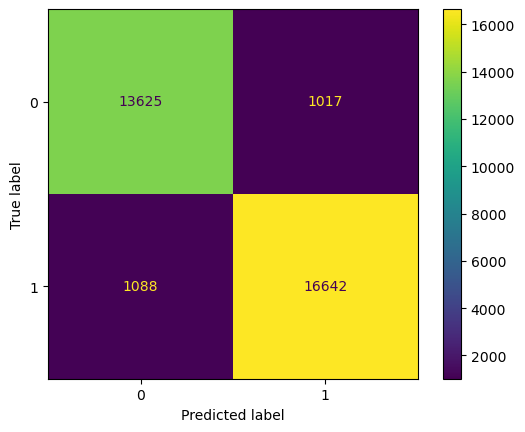

In [31]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

Question: What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?
In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively).
The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.)
Plot the decision tree
Examine the decision tree. Use plot_tree function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

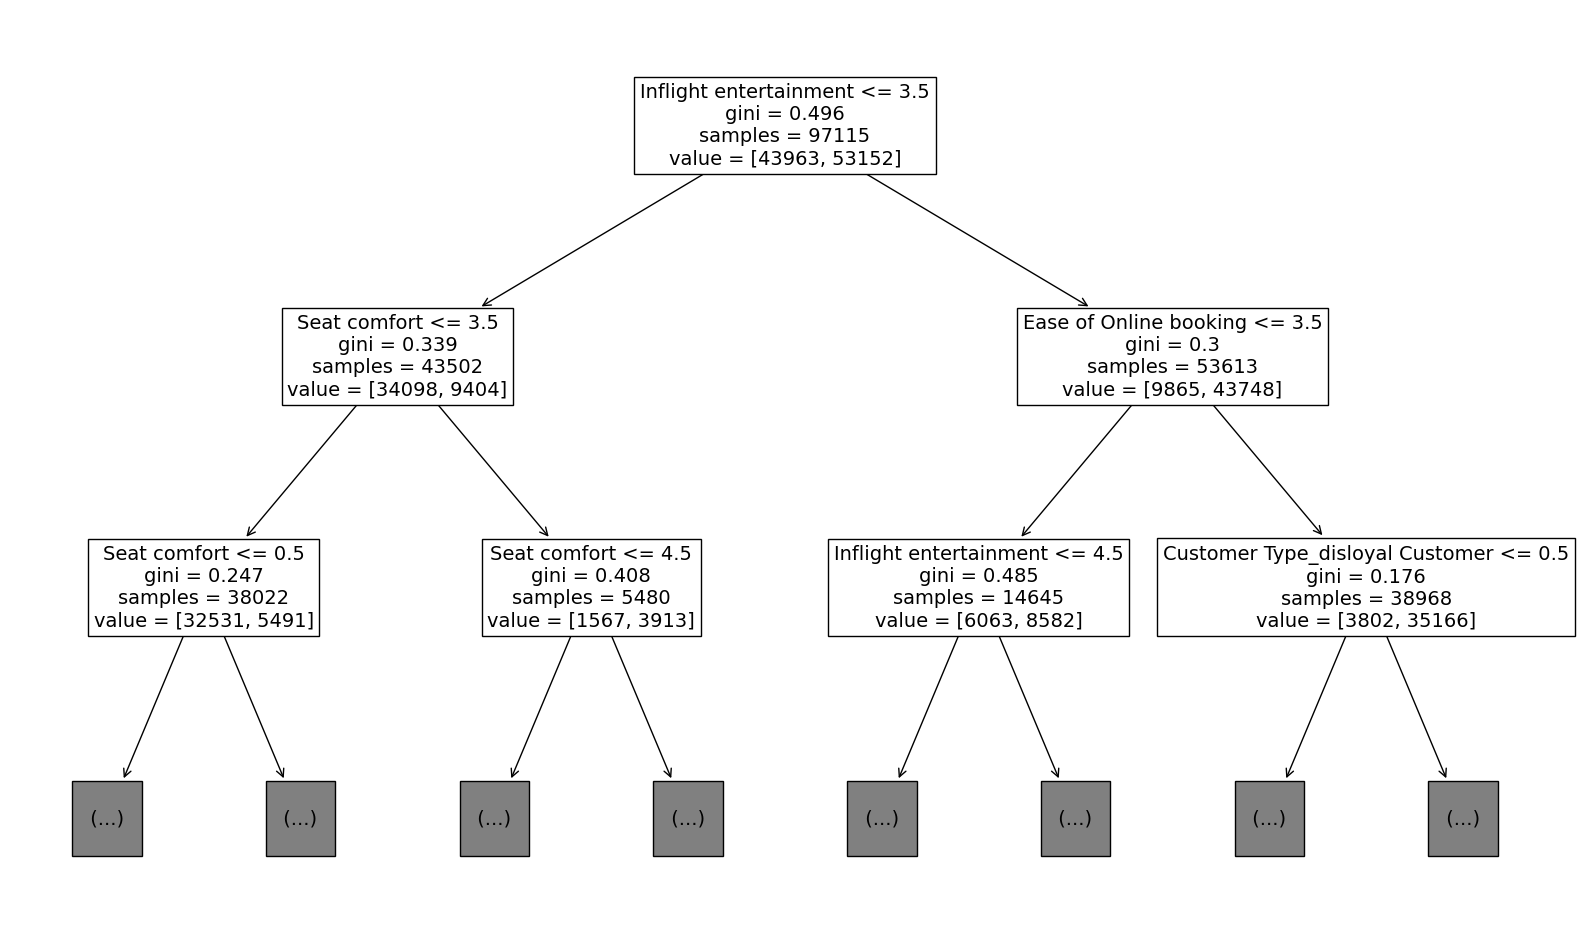

In [32]:
plt.figure(figsize=(20,12)) 
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns.tolist())
plt.show()

### Calculate feature importance

The DecisionTreeClassifier class comes with a feature_importances_ attribute that provides access to the features' relative importance in the model. The feature importances are computed when the fit() method is called on the DecisionTreeClassifier instance. In other words, it's information that is generated during model training. Here's how it works.

For each feature used in the tree, the algorithm finds all of the decision nodes that use that particular feature as the split criterion. Then for each of those decision nodes it computes the decrease in Gini impurity (or entropy, or log loss, or whatever metric you select when you fit the model—default is Gini impurity) that results from that split (so, the decrease from parent to children). Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as a percentage of the total decrease that resulted from all features.

Here is a simple example of how you can calculate feature importance from a tree diagram. This tree splits 10 samples using two features, X1 and X2:
 
Notice that the reduction in Gini impurity is weighted based on how many samples are in each node. Ultimately, the reduction that results from each feature is normalized (i.e., expressed as a percentage), and this percentage represents the importance of a given feature.

This can be interpreted as: X1 is responsible for 64.3% of the overall reduction of Gini impurity in the model, and X2 is responsible for 35.7% of the overall reduction of Gini impurity in the model.

Using the feature_importances_ attribute to fetch the relative importances of each feature, you can then plot the results.

In [33]:
importances = decision_tree.feature_importances_

In [36]:
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

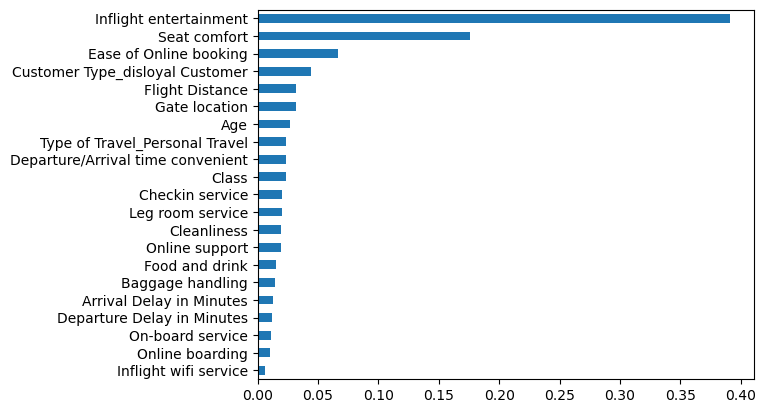

In [37]:
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax);

 The feature importance graph seems to confirm that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features for this model.

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters max_depth and min_samples_leaf using grid search and cross validation. Below are some values for the hyperparameters max_depth and min_samples_leaf.

In [38]:
tree_params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

### Check combinations of values
Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called tuned_decision_tree with random_state=0, make a GridSearchCV instance called clf, make sure to refit the estimator using "f1", and fit the model on the training set.

In [39]:
tuned_decision_tree = DecisionTreeClassifier()

In [40]:
clf = GridSearchCV(tuned_decision_tree, 
                   tree_params, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

In [41]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [94]:
pickle.dump(clf,open('/Users/andrew/Downloads/models/clf_dtree_airline.sav','wb'))

Question: How can you determine the best combination of values for the hyperparameters?
Use the best estimator tool to help uncover the best pair combination.

In [42]:
# Compute the best combination of values for the hyperparameters
clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2)

Question: What is the best combination of values for the hyperparameters?
After running the DecisionTreeClassifier, the maximum depth is 18 and the minimum number of samples is two, meaning this is the best combination of values.

In [43]:
# Determine the best average validation score
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9454


Question: What is the best average validation score?
The best validation score is 0.9454.

Determine the "best" decision tree model's accuracy, precision, recall, and F1 score
Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways.

In [44]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

In [45]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [46]:
result_table = make_results("Tuned Decision Tree", clf)

In [47]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945351,0.936033,0.954875,0.940771


Question: Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?
The F1 score for the decision tree that was not hyperparameter tuned is 0.940940 and the F1 score for the hyperparameter-tuned decision tree is 0.945422. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model.

### Plot the "best" decision tree
Use the plot_tree function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

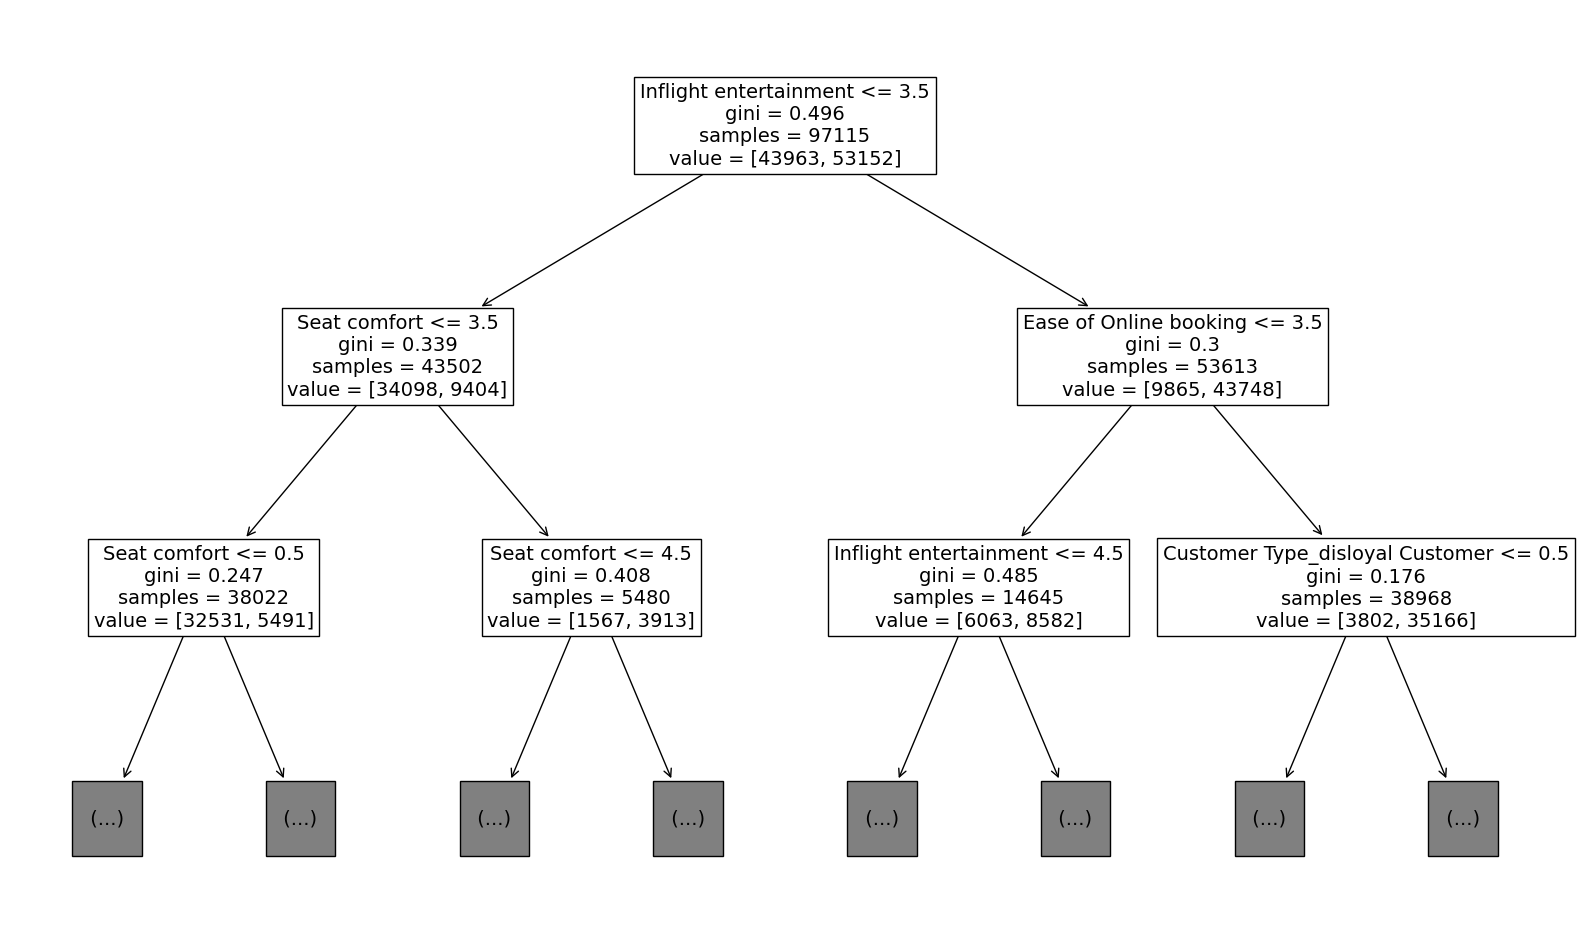

In [48]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns.to_list());

 The plot makes it seem like 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are among the most important features. The code below outputs a "most important" features graph from the model.

### Build another feature importance graph

You can build another feature importance graph to validate which features are most important.

In [49]:
importances = clf.best_estimator_.feature_importances_

In [50]:
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

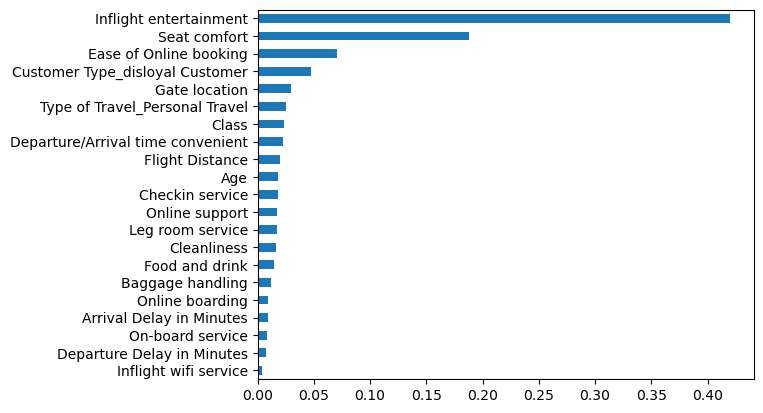

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax);

 The feature importance graph seems to confirm that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the "most important" features for this model.

Question: What do you think is the most important metric in this business case?

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reasons why each metric is important:

• Accuracy tends to be the metric that the stakeholders can best understand.

• Precision measures what proportion of predicted positives is truly positive. For example, if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn.

• Recall measures the percentage of actual positives a model correctly identified (true positive). For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer.

• F1 balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

Considerations

What are some key takeaways that you learned from this lab?

• Machine learning workflows may be used to clean and encode data for machine learning.

• While hyperparameter tuning can lead to an increase in performance, it doesn't always.

• The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.

What findings would you share with others?

• Decision trees accurately predicted satisfaction over 94 percent of the time.

• The confusion matrix is useful as it shows a similar number of true positives and true negatives.

• The visualization of the decision tree and the feature importance graph both suggest that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features in the model.

What would you recommend to stakeholders?

• Customer satisfaction is highly tied to 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking'.

. Improving these experiences should lead to better customer satisfaction.

• The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction.


## Random Forest Model

In [52]:
 import numpy as np
import pandas as pd

import pickle as pkl
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Once separated, split the data into train, validate, and test sets.

In [53]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

Tune the model
Now, fit and tune a random forest model with separate validation set. Begin by determining a set of hyperparameters for tuning the model using GridSearchCV.

In [54]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [55]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [56]:
# Instantiate model.
rf = RandomForestClassifier(random_state=0)

In [57]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [58]:
%%time
# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: user 5.92 s, sys: 281 ms, total: 6.21 s
Wall time: 19.5 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [62]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

Results and evaluation
Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [63]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [64]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=0)

In [65]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

Obtain performance scores

In [67]:
# Get precision score.
pc_test = precision_score(y_test, y_pred, pos_label = 1)
print("The precision score is {pc:.3f}".format(pc = pc_test))

The precision score is 0.950


In [68]:
# Get recall score.
rc_test = recall_score(y_test, y_pred, pos_label = 1)
print("The recall score is {rc:.3f}".format(rc = rc_test))

The recall score is 0.942


In [69]:
# Get accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))

The accuracy score is 0.941


In [70]:
# Get F1 score.
f1_test = f1_score(y_test, y_pred, pos_label = 1)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The F1 score is 0.946


Question: How is the F1-score calculated?
F1 scores are calculated using the following formula:
F1 = 2 * (precision * recall) / (precision + recall)
Question: What are the pros and cons of performing the model selection using test data instead of a separate validation dataset?
Pros:
• The coding workload is reduced.
• The scripts for data splitting are shorter.
• It's only necessary to evaluate test dataset performance once, instead of two evaluations (validate and test).
Cons:
• If a model is evaluated using samples that were also used to build or fine-tune that model, it likely will provide a biased evaluation.
• A potential overfitting issue could happen when fitting the model's scores on the test data.

Evaluate the model
Now that you have results, evaluate the model.
Question: What are the four basic parameters for evaluating the performance of a classification model?
1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive.
2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.
3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.
4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative.
Reminder: When fitting and tuning classification modeld, data professioals aim to minimize false positives and false negatives.
Question: What do the four scores demonstrate about your model, and how do you calculate them?
• Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations.
• Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations.
• Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.
• F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives.
Calculate the scores: precision score, recall score, accuracy score, F1 score.

In [71]:
# Precision score on test data set.
print("\nThe precision score is: {pc:.3f}".format(pc = pc_test), "for the test set,", "\nwhich means of all positive predictions,", "{pc_pct:.1f}% prediction are true positive.".format(pc_pct = pc_test * 100))


The precision score is: 0.950 for the test set, 
which means of all positive predictions, 95.0% prediction are true positive.


In [72]:
# Recall score on test data set.
print("\nThe recall score is: {rc:.3f}".format(rc = rc_test), "for the test set,", "\nwhich means of which means of all real positive cases in test set,", "{rc_pct:.1f}% are  predicted positive.".format(rc_pct = rc_test * 100))


The recall score is: 0.942 for the test set, 
which means of which means of all real positive cases in test set, 94.2% are  predicted positive.


In [73]:
# Accuracy score on test data set.
print("\nThe accuracy score is: {ac:.3f}".format(ac = ac_test), "for the test set,", "\nwhich means of all cases in test set,", "{ac_pct:.1f}% are predicted true positive or true negative.".format(ac_pct = ac_test * 100))


The accuracy score is: 0.941 for the test set, 
which means of all cases in test set, 94.1% are predicted true positive or true negative.


In [74]:
# F1 score on test data set.
print("\nThe F1 score is: {f1:.3f}".format(f1 = f1_test), "for the test set,", "\nwhich means the test set's harmonic mean is {f1_pct:.1f}%.".format(f1_pct = f1_test * 100))


The F1 score is: 0.946 for the test set, 
which means the test set's harmonic mean is 94.6%.


Question: How does this model perform based on the four scores?
The model performs well according to all 4 performance metrics. The model's precision score is slightly better than the 3 other metrics.

Evaluate the model
Finally, create a table of results that you can use to evaluate the performace of your model.

In [ ]:
Model	F1	Recall	Precision	Accuracy
0	Tuned Decision Tree	0.945351	0.936033	0.954875	0.940771


In [75]:
# Create table of results.
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest"],
                        'F1':  [0.945351, f1_test],
                        'Recall': [0.936033, rc_test],
                        'Precision': [0.954875, pc_test],
                        'Accuracy': [0.940771, ac_test]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945351,0.936033,0.954875,0.940771
1,Tuned Random Forest,0.946039,0.941850,0.950265,0.941153


Question: How does the random forest model compare to the decision tree model you built in the previous lab?
The tuned random forest has higher scores overall, so it is the better model. Particularly, it shows a better F1 score than the decision tree model, which indicates that the random forest model may do better at classification when taking into account false positives and false negatives.
Considerations
What are the key takeaways from this lab?
• Data exploring, cleaning, and encoding are necessary for model building.
• A separate validation set is typically used for tuning a model, rather than using the test set. This also helps avoid the evaluation becoming biased.
• F1 scores are usually more useful than accuracy scores. If the cost of false positives and false negatives are very different, it’s better to use the F1 score and combine the information from precision and recall.
• The random forest model yields a more effective performance than a decision tree model.
What summary would you provide to stakeholders?
• The random forest model predicted satisfaction with more than 94.2% accuracy. The precision is over 95% and the recall is approximately 94.5%.
• The random forest model outperformed the tuned decision tree with the best hyperparameters in most of the four scores. This indicates that the random forest model may perform better.
• Because stakeholders were interested in learning about the factors that are most important to customer satisfaction, this would be shared based on the tuned random forest.
• In addition, you would provide details about the precision, recall, accuracy, and F1 scores to support your findings.


## Tuned XGBoost

In [76]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [78]:
from xgboost import XGBClassifier
from xgboost import plot_importance

Question: Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?
• satisfaction represents the classification variable to be predicted.
• Many of these variables seem like meaningful predictors of satisfaction. In particular, delays (either departure or arrival) may be negatively correlated with satisfaction.

Model preparation
Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.
Question: Which metrics are most suited to evaluating this type of model?
• As this is a binary classfication problem, it will be important to evaluate not just accuracy, but the balance of false positives and false negatives that the model's predictions provide. Therefore, precision, recall, and ultimately the F1 score will be excellent metrics to use.
• The ROC AUC (Area Under the Receiver Operating Characteristic) score is also suited to this type of modeling.
Prepare your data for predictions
You may have noticed when previewing your data that there are several non-numerical variables (object data types) within the dataset.
To prepare this DataFrame for modeling, first convert these variables into a numerical format.

Divide your data
Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

Model building
"Instantiate" your XGBClassifer
Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [79]:
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic')

Define the parameters for hyperparameter tuning
To identify suitable parameters for your xgboost model, first define the parameters for hyperparameter tuning. Specifically, define a range of values for max_depth, min_child_weight, learning_rate, n_estimators, subsample, and colsample_bytree.
Consider a more limited range for each parameter to allow for timely iteration and model training.

In [80]:
# Define parameters for tuning as `cv_params`.
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

Question: What is the likely effect of adding more estimators to your GridSearch?
• More estimators will initially improve the model's performance. However, increasing the number of estimators will also considerably increase the time spent during the GridSearch process, and there will be diminishing returns as the number of estimators continues to increase.
Define how the models will be evaluated
Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [81]:
# Define your criteria as `scoring`.
scoring = ['accuracy', 'precision', 'recall', 'f1']

Construct the GridSearch cross-validation
Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify which metric from above will guide the refit strategy.

In [82]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

Fit the GridSearch model to your training data
If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.
Note: The following cell might take several minutes to run.

In [83]:
%%time
# Fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 38.9 s, sys: 3.42 s, total: 42.3 s
Wall time: 22.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Question: Which optimal set of parameters did the GridSearch yield?
Through accessing the best_params_ attribute of the fitted GridSearch model, the optimal set of hyperparameters was:
{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}
Note: Your results may vary from this example response.

Save your model for reference using pickle
Use the pickle library you've already imported to save the output of this model.

In [84]:
# Use `pickle` to save the trained model.
pickle.dump(xgb_cv, open('/Users/andrew/Downloads/models/xgb_cv.sav', 'wb'))

Results and evaluation
Formulate predictions on your test set
To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.
First, use your trained model to formulate predictions on your test set.

In [85]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = xgb_cv.predict(X_test)

Leverage metrics to evaluate your model's performance
Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [86]:
# 1. Print your accuracy score.
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print yoir recall score.
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9307117261831213
precision score: 0.9408482778252206
recall score: 0.9320924985899606
f1 score: 0.9364499220852812


Question: How should you interpret your accuracy score?
The accuracy score for this model is 0.939, or 93.9% accurate.
Question: Is your accuracy score alone sufficient to evaluate your model?
In classification problems, accuracy is useful to know but may not be the best metric to evaluate this model.
Question: When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?
Precision and recall scores are both useful to evaluate the correct predictive capability of the model because they balance the false positives and false negatives inherent in prediction. The model shows a precision score of 0.948, suggesting the model is very good at predicting true positives. This means the model correctly predicts whether the airline passenger will be satisfied. The recall score of 0.940 is also very good. This means that the model does a good job of correctly identifying dissatisfied passengers within the dataset. These two metrics combined give a better assessment of model performance than the accuracy metric does alone.
Question: What does your model's F1 score tell you, beyond what the other metrics provide?*
The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.944, which suggests very strong predictive power in this model.
Gain clarity with the confusion matrix
Recall that a confusion matrix is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.
Create a confusion matrix based on your predicted values for the test set.

In [87]:
# Construct and display your confusion matrix.

In [88]:
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

In [89]:
# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

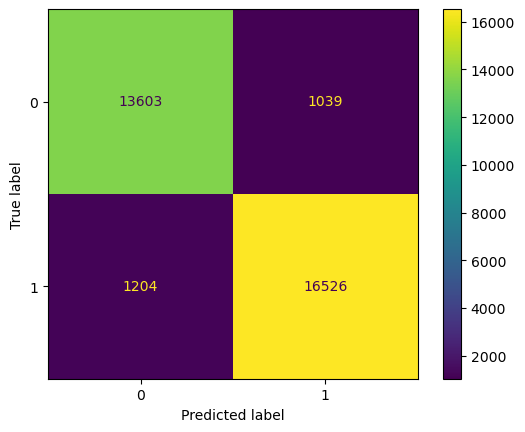

In [90]:
# Plot the visual in-line.
disp.plot()

Question: When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?
The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.
Additionally, the concentration of true positives and true negatives stands out relative to false positives and false negatives, respectively. This ratio is why the precision score is so high (0.944).
Visualize most important features
xgboost has a built-in function to visualize the relative importance of the features in the model using matplotlib. Output and examine the feature importance of your model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

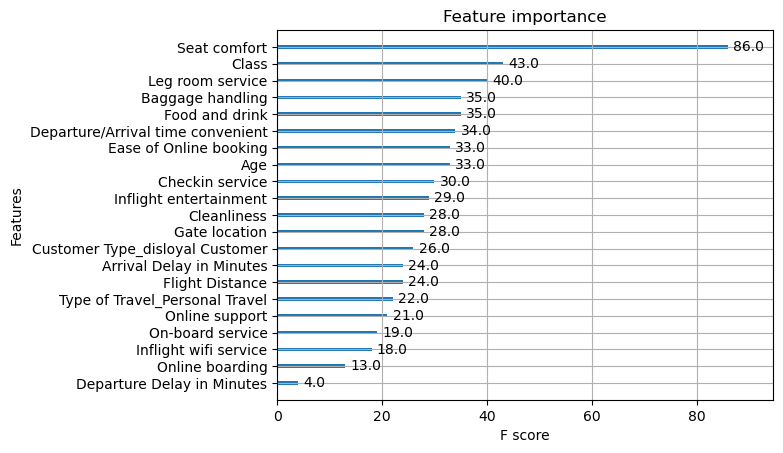

In [91]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_)

Question: 

Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

• By a wide margin, "seat comfort" rated as most important in the model.The type of seating is very different between first class and coach seating. However, the perks of being in first class also go beyond the seating type, so perhaps that is an underlying explanation of this feature's importance.

• Surprisingly, delays (both arrival and departure) did not score as highly important.

Compare models

Create a table of results to compare model performance.

In [ ]:

Model	F1	Recall	Precision	Accuracy
0	Tuned Decision Tree	0.945351	0.936033	0.954875	0.940771
1	Tuned Random Forest	0.946039	0.941850	0.950265	0.941153


In [92]:
# Create a table of results to compare model performance.

table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945351, 0.946039, f1_score],
                      'Recall': [0.936033, 0.941850, rc_score],
                      'Precision': [0.954875, 0.950265, pc_score],
                      'Accuracy': [0.940771, 0.941153, ac_score]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945351,0.936033,0.954875,0.940771
1,Tuned Random Forest,0.946039,0.941850,0.950265,0.941153
2,Tuned XGBoost,0.936450,0.932092,0.940848,0.930712


In [ ]:
Model	F1	Recall	Precision	Accuracy
0	Tuned Decision Tree	0.945422	0.935863	0.955197	0.940864
1	Tuned Random Forest	0.947306	0.944501	0.950128	0.942450
2	Tuned XGBoost	0.942862	0.936471	0.949341	0.937604


Question: How does this model compare to the decision tree and random forest models you built in previous labs?

Based on the results shown in the table above, the F1, precision, recall, and accuracy scores of the XGBoost model are similar to the corresponding scores of the decision tree and random forest models. The random forest model seemed to outperform the decision tree model as well as the XGBoost model.

Considerations

What are some key takeaways you learned from this lab?

•	The evaluation of the model is important to inform if the model has delivered accurate predictions.

•	Splitting the data is important for ensuring that there is new data for the model to test its predictive performance.

•	Each metric provides an evaluation from a different standpoint, and accuracy alone is not a strong way to evaluate a model.

•	Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

How would you share your findings with your team?

•	Showcase the data used to create the prediction and the performance of the model overall.

•	Review the sample output of the features and the confusion matrix to reference the model's performance.

•	Highlight the metric values, emphasizing the F1 score.

•	Visualize the feature importance to showcase what drove the model's predictions.

What would you share with and recommend to stakeholders?

•	The model created is highly effective at predicting passenger satisfaction.

•	The feature importance of seat comfort warrants additional investigation. It will be important to ask domain experts why they believe this feature scores so highly in this model.